In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('anova_60.csv')

In [3]:
df['Dur'].max()

59.99998100000001

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
cf_matrix = confusion_matrix(y_test, rfc_pred)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

NameError: name 'confusion_matrix' is not defined

## RF test on 5 sec

In [4]:
df1 = pd.read_csv('anova_5.csv')

In [5]:
X_train = df.drop('Class',axis=1)
y_train = df['Class']
X_test = df1.drop('Class',axis=1)
y_test = df1['Class']

from sklearn.svm import SVC
models = SVC(gamma=0.00000000001)
models.fit(X_train,y_train)
predictions = models.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


[[183   0  26  31]
 [  1   5 234   0]
 [  2   0 237   1]
 [  4   0 148  88]]
              precision    recall  f1-score   support

         1.0       0.96      0.76      0.85       240
         2.0       1.00      0.02      0.04       240
         3.0       0.37      0.99      0.54       240
         4.0       0.73      0.37      0.49       240

    accuracy                           0.53       960
   macro avg       0.77      0.53      0.48       960
weighted avg       0.77      0.53      0.48       960



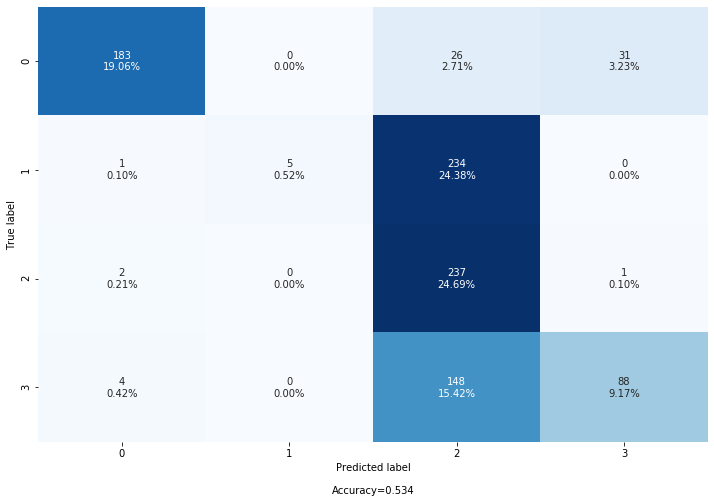

In [6]:
cf_matrix = confusion_matrix(y_test, predictions)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

## RF test on 10 sec

In [7]:

df2 = pd.read_csv('anova_10.csv')

In [8]:
df2['Dur'].max()

KeyError: 'Dur'

In [9]:
X_train = df.drop('Class',axis=1)
y_train = df['Class']
X_test = df2.drop('Class',axis=1)
y_test = df2['Class']

from sklearn.svm import SVC
models = SVC(gamma=0.00000000001)
models.fit(X_train,y_train)
predictions = models.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))



[[178   0  42  20]
 [  0  53 186   1]
 [  0   0 239   1]
 [  7   0 140  93]]
              precision    recall  f1-score   support

         1.0       0.96      0.74      0.84       240
         2.0       1.00      0.22      0.36       240
         3.0       0.39      1.00      0.56       240
         4.0       0.81      0.39      0.52       240

    accuracy                           0.59       960
   macro avg       0.79      0.59      0.57       960
weighted avg       0.79      0.59      0.57       960



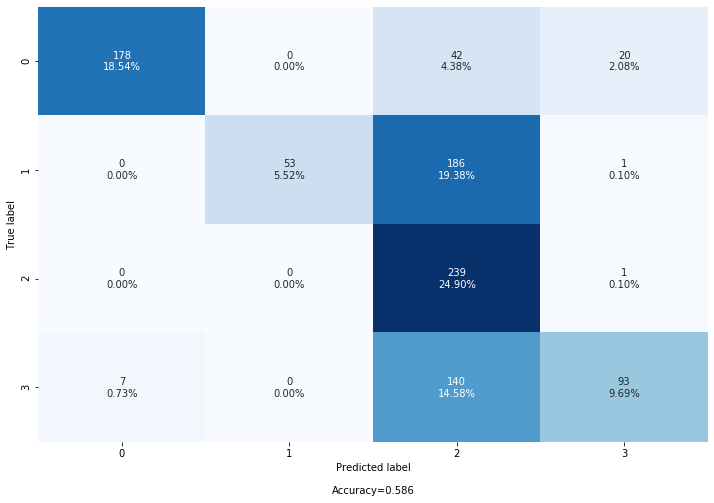

In [10]:
cf_matrix = confusion_matrix(y_test, predictions)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

## RF test on 15 sec


In [40]:
df3 = pd.read_csv('flow_multi_15.csv')

In [41]:
df3['Dur'].max()

14.999995000000002

In [42]:
X_train = df.drop('Class',axis=1)
y_train = df['Class']
X_test = df3.drop('Class',axis=1)
y_test = df3['Class']

from sklearn.svm import SVC
models = SVC(gamma=0.0000000001)
models.fit(X_train,y_train)
predictions = models.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))




[[202   0  38   0]
 [  6  63  18 153]
 [  4   0 234   2]
 [ 11   0  53 176]]
              precision    recall  f1-score   support

         1.0       0.91      0.84      0.87       240
         2.0       1.00      0.26      0.42       240
         3.0       0.68      0.97      0.80       240
         4.0       0.53      0.73      0.62       240

    accuracy                           0.70       960
   macro avg       0.78      0.70      0.68       960
weighted avg       0.78      0.70      0.68       960



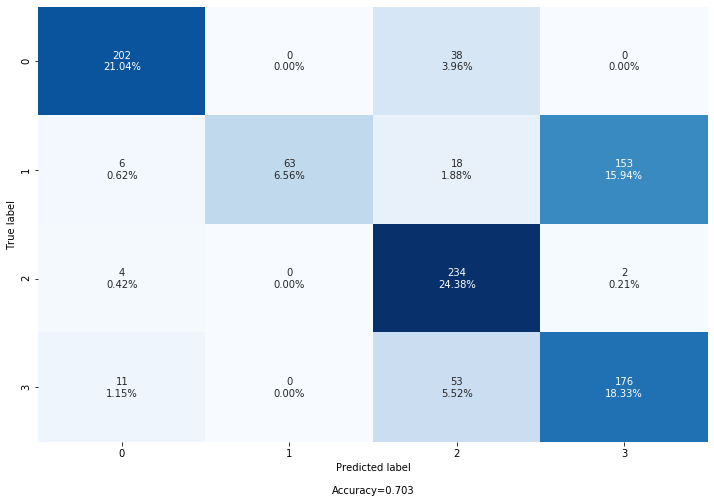

In [43]:
cf_matrix = confusion_matrix(y_test, predictions)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

## RF test on 20 sec


In [44]:
df4 = pd.read_csv('anova.csv')

In [45]:
X_train = df.drop('Class',axis=1)
y_train = df['Class']
X_test = df4.drop('Class',axis=1)
y_test = df4['Class']

from sklearn.svm import SVC
models = SVC(gamma=0.0000000001)
models.fit(X_train,y_train)
predictions = models.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


[[190   0  50   0]
 [  3  87  36 114]
 [  1   0 237   2]
 [ 10   0 115 115]]
              precision    recall  f1-score   support

         1.0       0.93      0.79      0.86       240
         2.0       1.00      0.36      0.53       240
         3.0       0.54      0.99      0.70       240
         4.0       0.50      0.48      0.49       240

    accuracy                           0.66       960
   macro avg       0.74      0.66      0.64       960
weighted avg       0.74      0.66      0.64       960



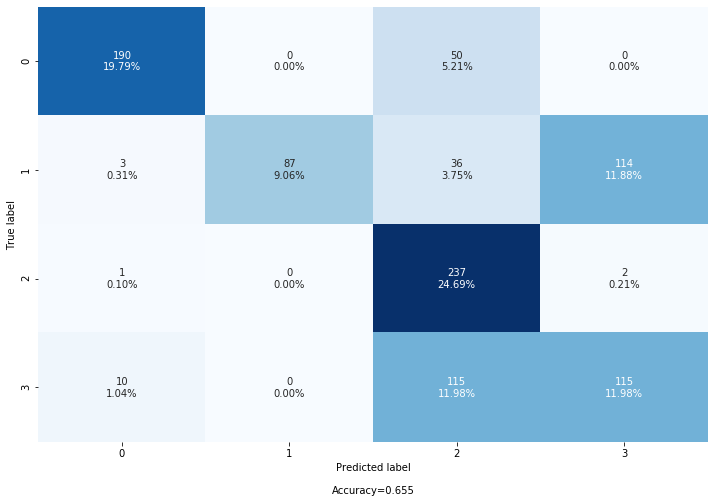

In [46]:
cf_matrix = confusion_matrix(y_test, predictions)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

## RF test on 25 sec


In [11]:
df6 = pd.read_csv('anova_25.csv')

In [12]:
X_train = df.drop('Class',axis=1)
y_train = df['Class']
X_test = df6.drop('Class',axis=1)
y_test = df6['Class']

from sklearn.svm import SVC
models = SVC(gamma=0.0000000001)
models.fit(X_train,y_train)
predictions = models.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[182   0  57   1]
 [  1 141  28  70]
 [  2   1 236   1]
 [ 13   0 123 104]]
              precision    recall  f1-score   support

         1.0       0.92      0.76      0.83       240
         2.0       0.99      0.59      0.74       240
         3.0       0.53      0.98      0.69       240
         4.0       0.59      0.43      0.50       240

    accuracy                           0.69       960
   macro avg       0.76      0.69      0.69       960
weighted avg       0.76      0.69      0.69       960



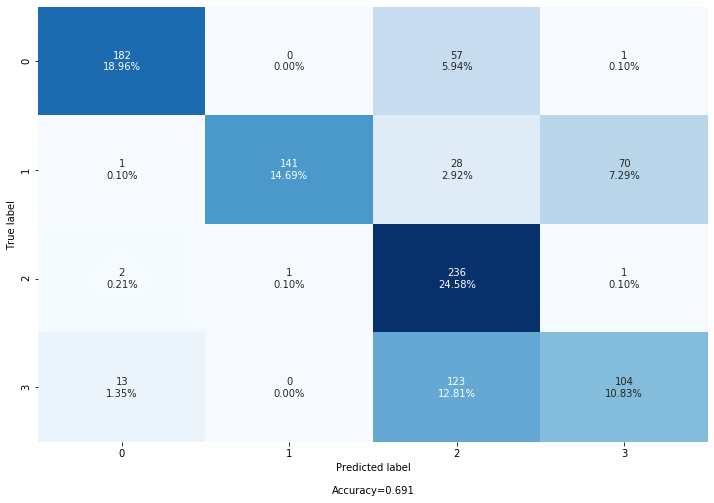

In [13]:
cf_matrix = confusion_matrix(y_test, predictions)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

## RF test on 30 sec


In [14]:
df5 = pd.read_csv('anova_30.csv')

In [15]:
X_train = df.drop('Class',axis=1)
y_train = df['Class']
X_test = df5.drop('Class',axis=1)
y_test = df5['Class']

from sklearn.svm import SVC
models = SVC(gamma=0.0000000001)
models.fit(X_train,y_train)
predictions = models.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


[[174   0  64   2]
 [  5 142  20  73]
 [  1   0 237   2]
 [ 16   0 104 120]]
              precision    recall  f1-score   support

         1.0       0.89      0.72      0.80       240
         2.0       1.00      0.59      0.74       240
         3.0       0.56      0.99      0.71       240
         4.0       0.61      0.50      0.55       240

    accuracy                           0.70       960
   macro avg       0.76      0.70      0.70       960
weighted avg       0.76      0.70      0.70       960



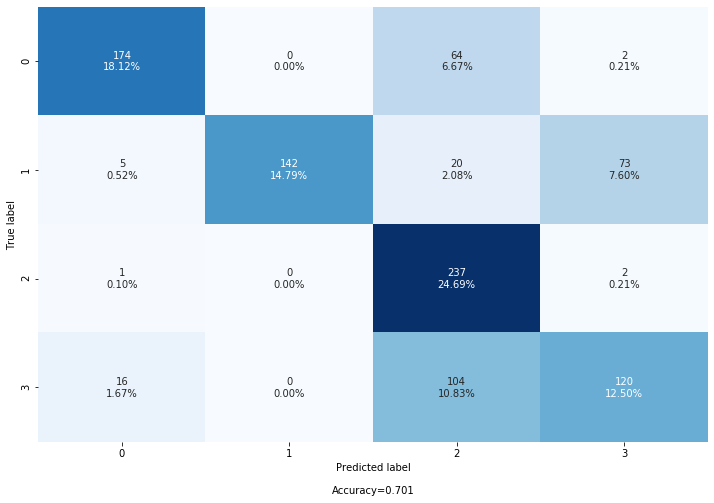

In [16]:
cf_matrix = confusion_matrix(y_test, predictions)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

# RF test on 60 sec


In [17]:
from sklearn.model_selection import train_test_split
X = df.drop('Class',axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
from sklearn.svm import SVC


models = SVC(gamma=0.0000000001)
models.fit(X_train,y_train)
predictions = models.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[51  0 22  0]
 [ 0 62  7  0]
 [ 0  0 82  0]
 [ 1  0 25 38]]
              precision    recall  f1-score   support

         1.0       0.98      0.70      0.82        73
         2.0       1.00      0.90      0.95        69
         3.0       0.60      1.00      0.75        82
         4.0       1.00      0.59      0.75        64

    accuracy                           0.81       288
   macro avg       0.90      0.80      0.81       288
weighted avg       0.88      0.81      0.81       288



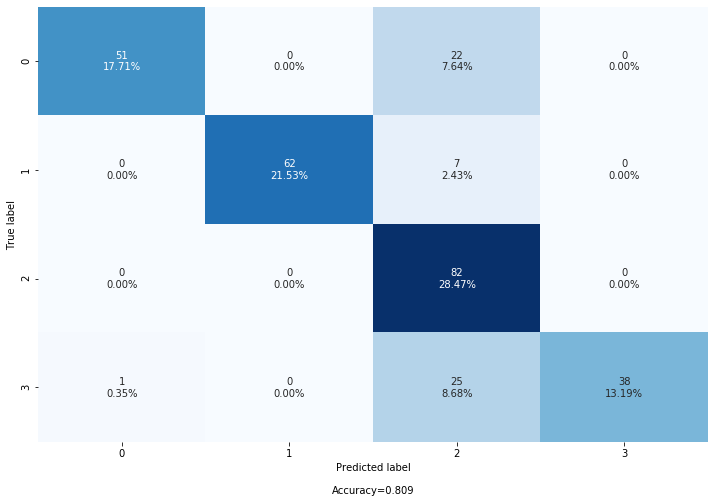

In [18]:
cf_matrix = confusion_matrix(y_test, predictions)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

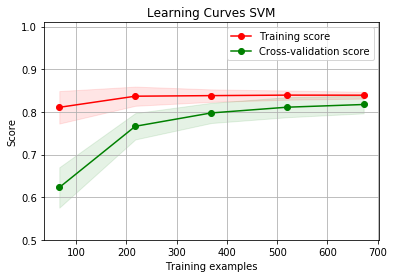

In [20]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring='f1_macro')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X = df.drop('Class',axis=1)
y = df['Class']



title = "Learning Curves SVM"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
models = SVC(gamma=0.0000000001)
plot_learning_curve(models, title, X, y, (0.5, 1.01), cv=cv, n_jobs=10)

plt.show()

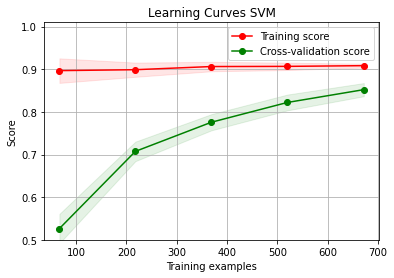

In [43]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring='f1_macro')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X = df.drop('Class',axis=1)
y = df['Class']



title = "Learning Curves SVM"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
models = SVC(gamma=0.00000001)
plot_learning_curve(models, title, X, y, (0.5, 1.01), cv=cv, n_jobs=10)

plt.show()